In [13]:
# Import fundamental libraries
# import sys
import os

# Import datasci libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from PIL import Image
import datetime as dt

# Configure fonts
FONT_PATH = "/workspaces/Enterprise/00_Pinksheepkit/fonts/poppins/Poppins-{0}.ttf"
# FONT_PATH = "c://Users//Art//Documents//A1-AspirePC//CS Project//07_Enterprise//Enterprise//00_Pinksheepkit//fonts//poppins//Poppins-{0}.ttf"
HEADING = "Bold"
LABEL = "Regular"
CONTENT = "Light"

H_FONT = {"fontproperties": fm.FontProperties(fname=FONT_PATH.format(HEADING)), "size": 12}
L_FONT = {"fontproperties": fm.FontProperties(fname=FONT_PATH.format(LABEL)), "size": 10}
C_FONT = {"fontproperties": fm.FontProperties(fname=FONT_PATH.format(CONTENT)), "size": 8}

# Configure plt rc params
plt.rcParams['figure.dpi'] = 500

# Configure system path
# sys.path = [
#     '/workspaces/Enterprise/02_Candlestick', # Working dir
#     '/home/codespace/.python/current/lib/python310.zip',
#     '/home/codespace/.python/current/lib/python3.10',
#     '/home/codespace/.python/current/lib/python3.10/lib-dynload',
#     '/home/codespace/.local/lib/python3.10/site-packages',
#     '/home/codespace/.python/current/lib/python3.10/site-packages']


In [14]:
# Get file path
# PATH_INPUT = "c://Users//Art//Documents//A1-AspirePC//CS Project//07_Enterprise//Enterprise//02_Candlestick//input//image//"
PATH_INPUT = "/workspaces/Enterprise/02_Candlestick/input/image/"
FILE_INPUT = sorted(next(os.walk(PATH_INPUT), (None, None, []))[2])

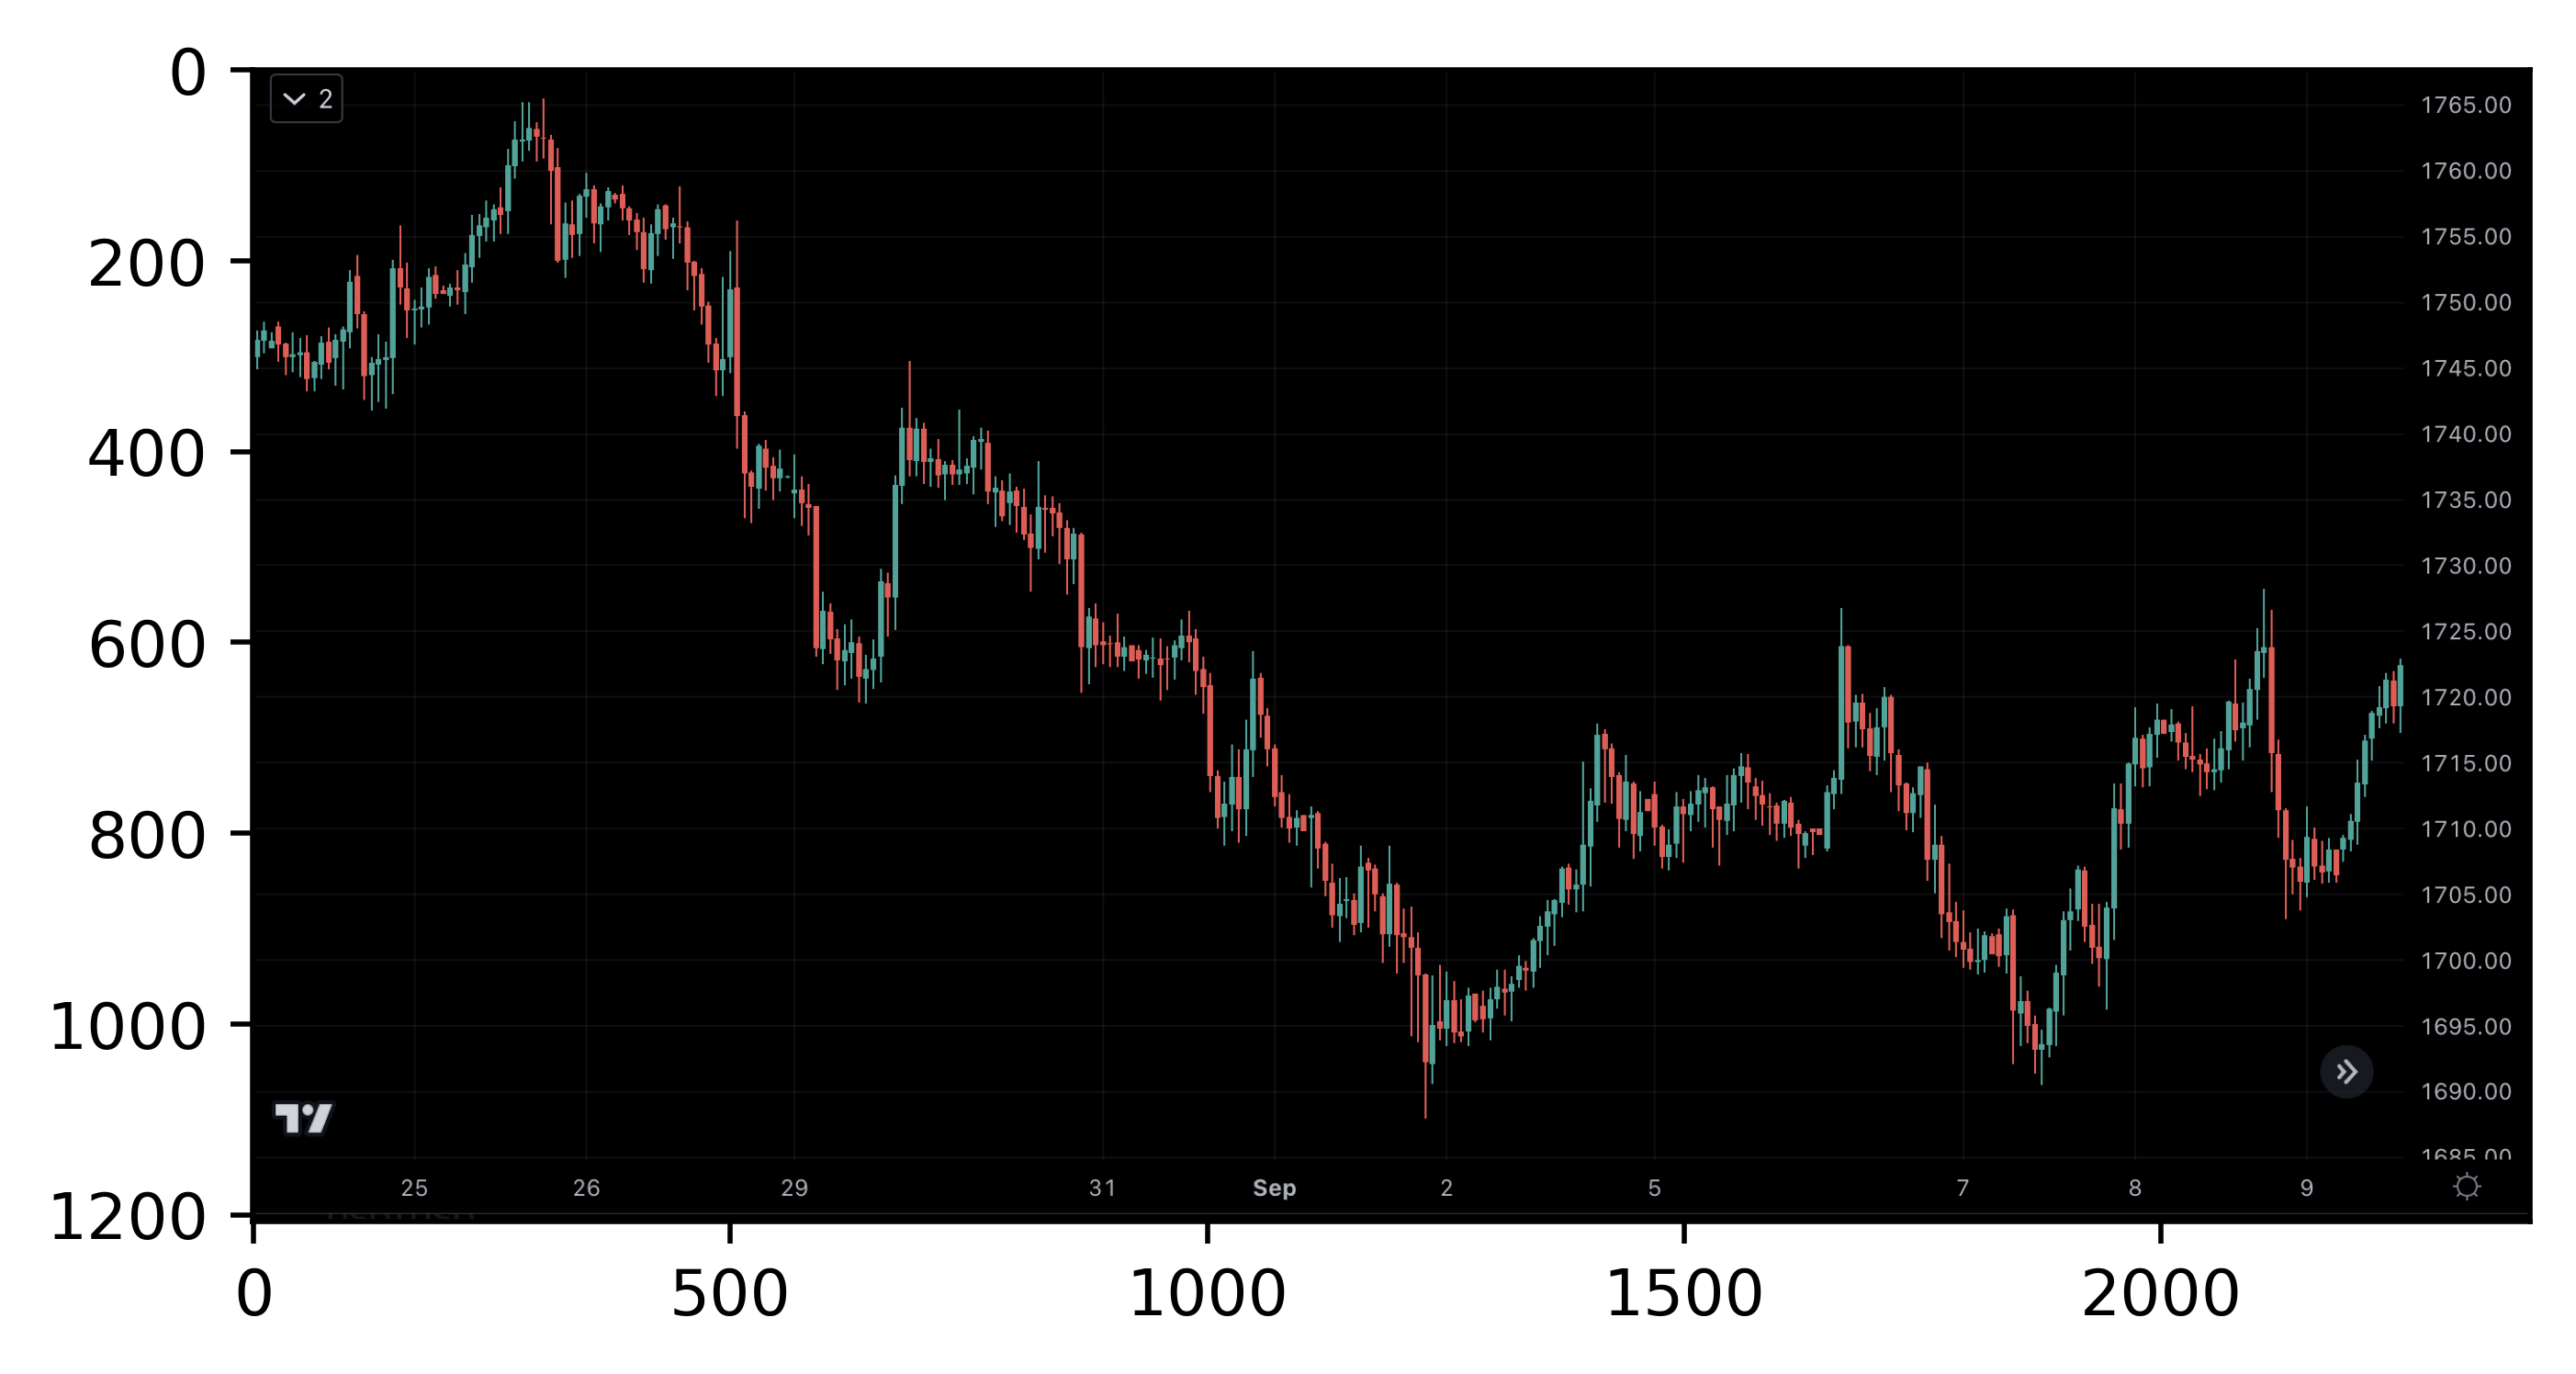

In [15]:
# load the image and convert into list
IMG = Image.open(PATH_INPUT + FILE_INPUT[14])
IMG_LIST = np.asarray(IMG).tolist()

# Loop over pixels and collect frequency of each color pixel
COLOR_FREQ = {(0, 0, 0): 0}
for h in np.arange(len(IMG_LIST)):
    for w in np.arange(len(IMG_LIST[h])):
        r = IMG_LIST[h][w][0]
        g = IMG_LIST[h][w][1]
        b = IMG_LIST[h][w][2]
        if (r, g, b) in COLOR_FREQ:
            COLOR_FREQ[(r, g, b)] += 1
        else:
            COLOR_FREQ[(r, g, b)] = 1

# Sort COLOR_FREQ keys by values
COLOR_FREQ = ({k: v for k, v in sorted(COLOR_FREQ.items(), key=lambda item: item[1])})

# Check processed image
plt.imshow(IMG_LIST)


In [16]:
# Plot color composition
def color_composition(color_freq):
    """Scatter plot of all pixel R/G color composition"""

    # Prepare varibles for R-G plot
    var_label = list(color_freq.keys())
    var_freq = list(color_freq.values())
    var_r = [r for r, g, b in var_label]
    var_g = [g for r, g, b in var_label]
    var_colors = [((r / 255), (g / 255), (b / 255)) for r, g, b in var_label]
    var_size = [100 * s/(100 + s) for s in var_freq]
    
    # Prepare varibles for (R+G)-(R/G) plot
    var_plus = [r + g for r, g, b in var_label]
    var_diff = [r - g for r, g, b in var_label]

    # Plot bar charts
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].scatter(var_r, var_g, c=var_colors, s=var_size)
    ax[1].scatter(var_diff, var_plus, c=var_colors, s=var_size)
    
    # # Format charts
    plt.xticks(**C_FONT)
    plt.yticks(**C_FONT)
    ax[0].set_title("Image color composition R/G", **H_FONT)
    ax[0].set_xlabel("Red HEX", **L_FONT)
    ax[0].set_ylabel("Green HEX", **L_FONT)
    ax[0].grid(True)
    ax[1].set_title("Image color composition RG-Brightness", **H_FONT)
    ax[1].set_xlabel("R - G", **L_FONT)
    ax[1].set_ylabel("R + G", **L_FONT)
    ax[1].grid(True)

    return(fig, ax)


(<Figure size 5000x2500 with 2 Axes>,
 array([<Axes: title={'center': 'Image color composition R/G'}, xlabel='Red HEX', ylabel='Green HEX'>,
        <Axes: title={'center': 'Image color composition RG-Brightness'}, xlabel='R - G', ylabel='R + G'>],
       dtype=object))

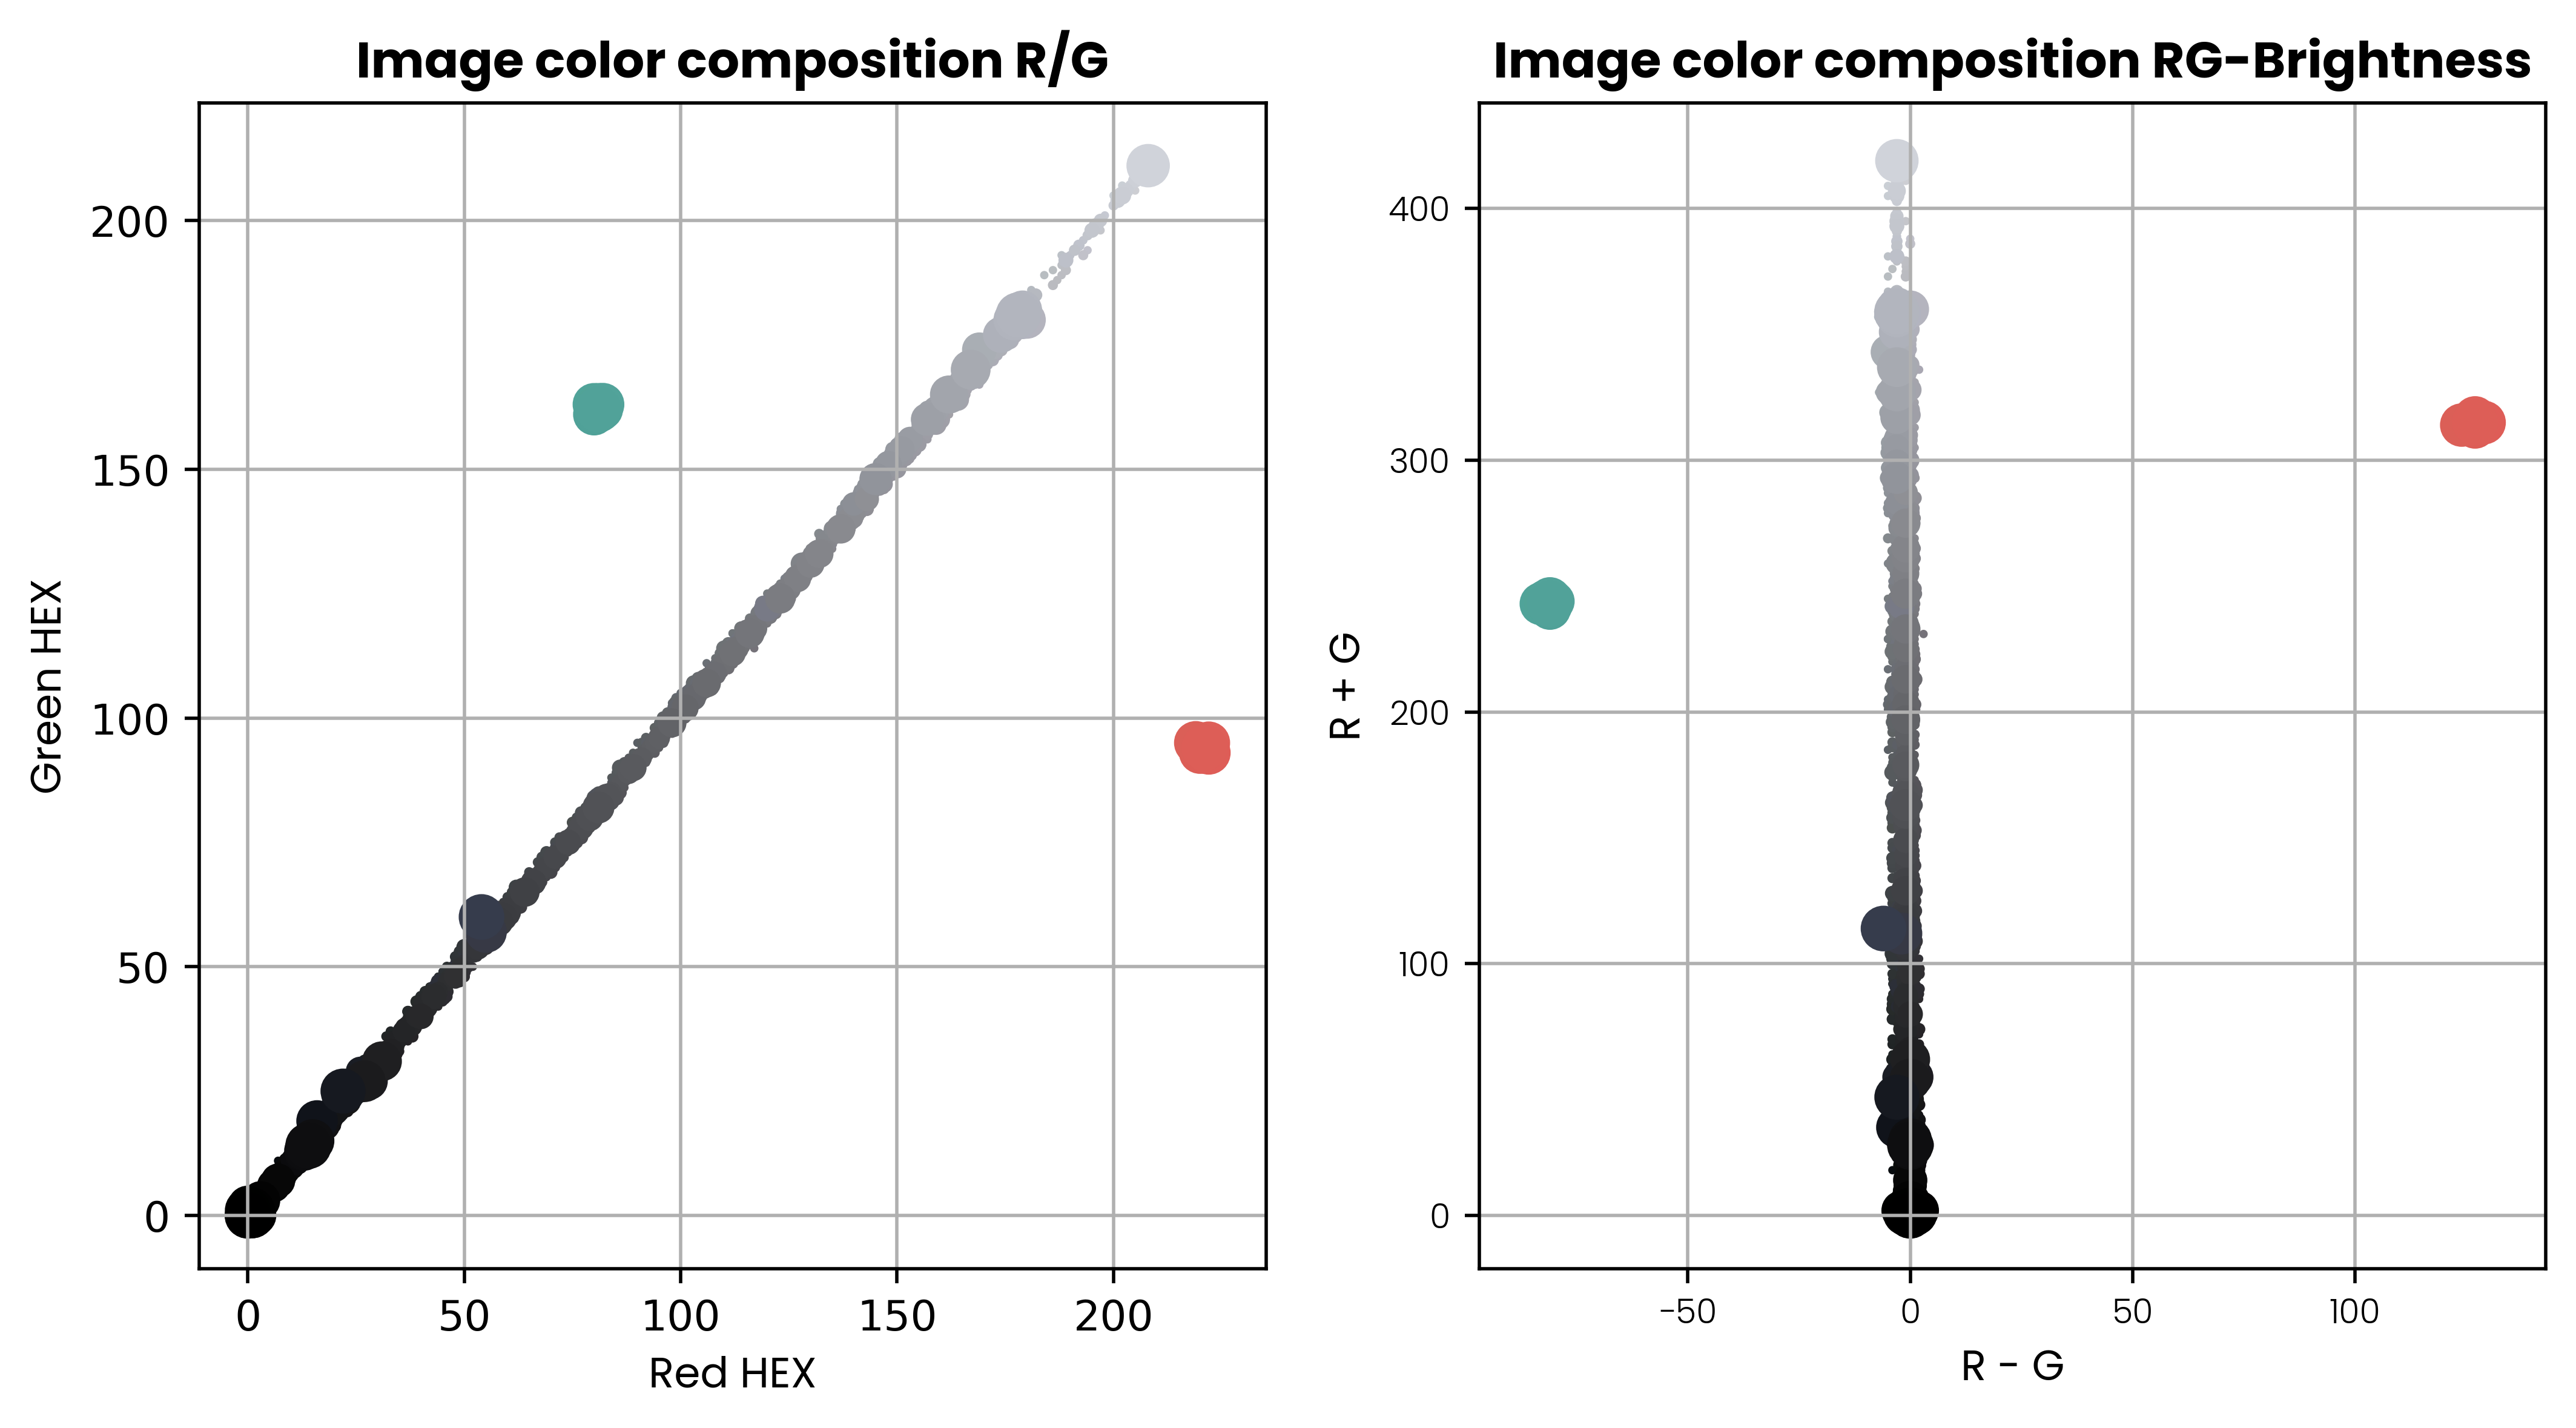

In [17]:
# Analyze color composition
color_composition(COLOR_FREQ)

# Bullish candle -> (70-120, 150-170, 140-160) -> (81, 162, 153)
# Bearish candle -> (180-230, 80-100, 80-100) -> (221, 94, 87)

In [18]:
# Highlight bull and bear candles
# Bull -> R - G < -10 & R + G > 200
# Bear -> R + G > 10 & R + G > 200
# Loop over pixels
CANDLESTICK_POLYMERASE = {} # {w: [count, lowest_point]}
for h in np.arange(len(IMG_LIST)):
    for w in np.arange(len(IMG_LIST[h])):
        r = IMG_LIST[h][w][0]
        g = IMG_LIST[h][w][1]
        b = IMG_LIST[h][w][2]
        if (r + g < 200) & (abs(r - g) > 10):
            IMG_LIST[h][w] = (255, 0, 255)
        elif (r + g > 200) & (r - g < -10):
            if w in CANDLESTICK_POLYMERASE:
                CANDLESTICK_POLYMERASE[w][0] += 1
                CANDLESTICK_POLYMERASE[w][1] = len(IMG_LIST[h]) - h - 1
            else:
                CANDLESTICK_POLYMERASE[w] = [1, len(IMG_LIST[h]) - h - 1]
        elif (r + g > 200) & (r - g > 10):
            if w in CANDLESTICK_POLYMERASE:
                CANDLESTICK_POLYMERASE[w][0] -= 1
                CANDLESTICK_POLYMERASE[w][1] = len(IMG_LIST[h]) - h - 1
            else:
                CANDLESTICK_POLYMERASE[w] = [-1, len(IMG_LIST[h]) - h - 1]
        else:
            if w not in CANDLESTICK_POLYMERASE:
                CANDLESTICK_POLYMERASE[w] = [0, 0]

# Sort CANDLESTICK_POLYMERASE keys
CANDLESTICK_POLYMERASE = ({k: v for k, v in sorted(
    CANDLESTICK_POLYMERASE.items(), key=lambda item: item[0])})


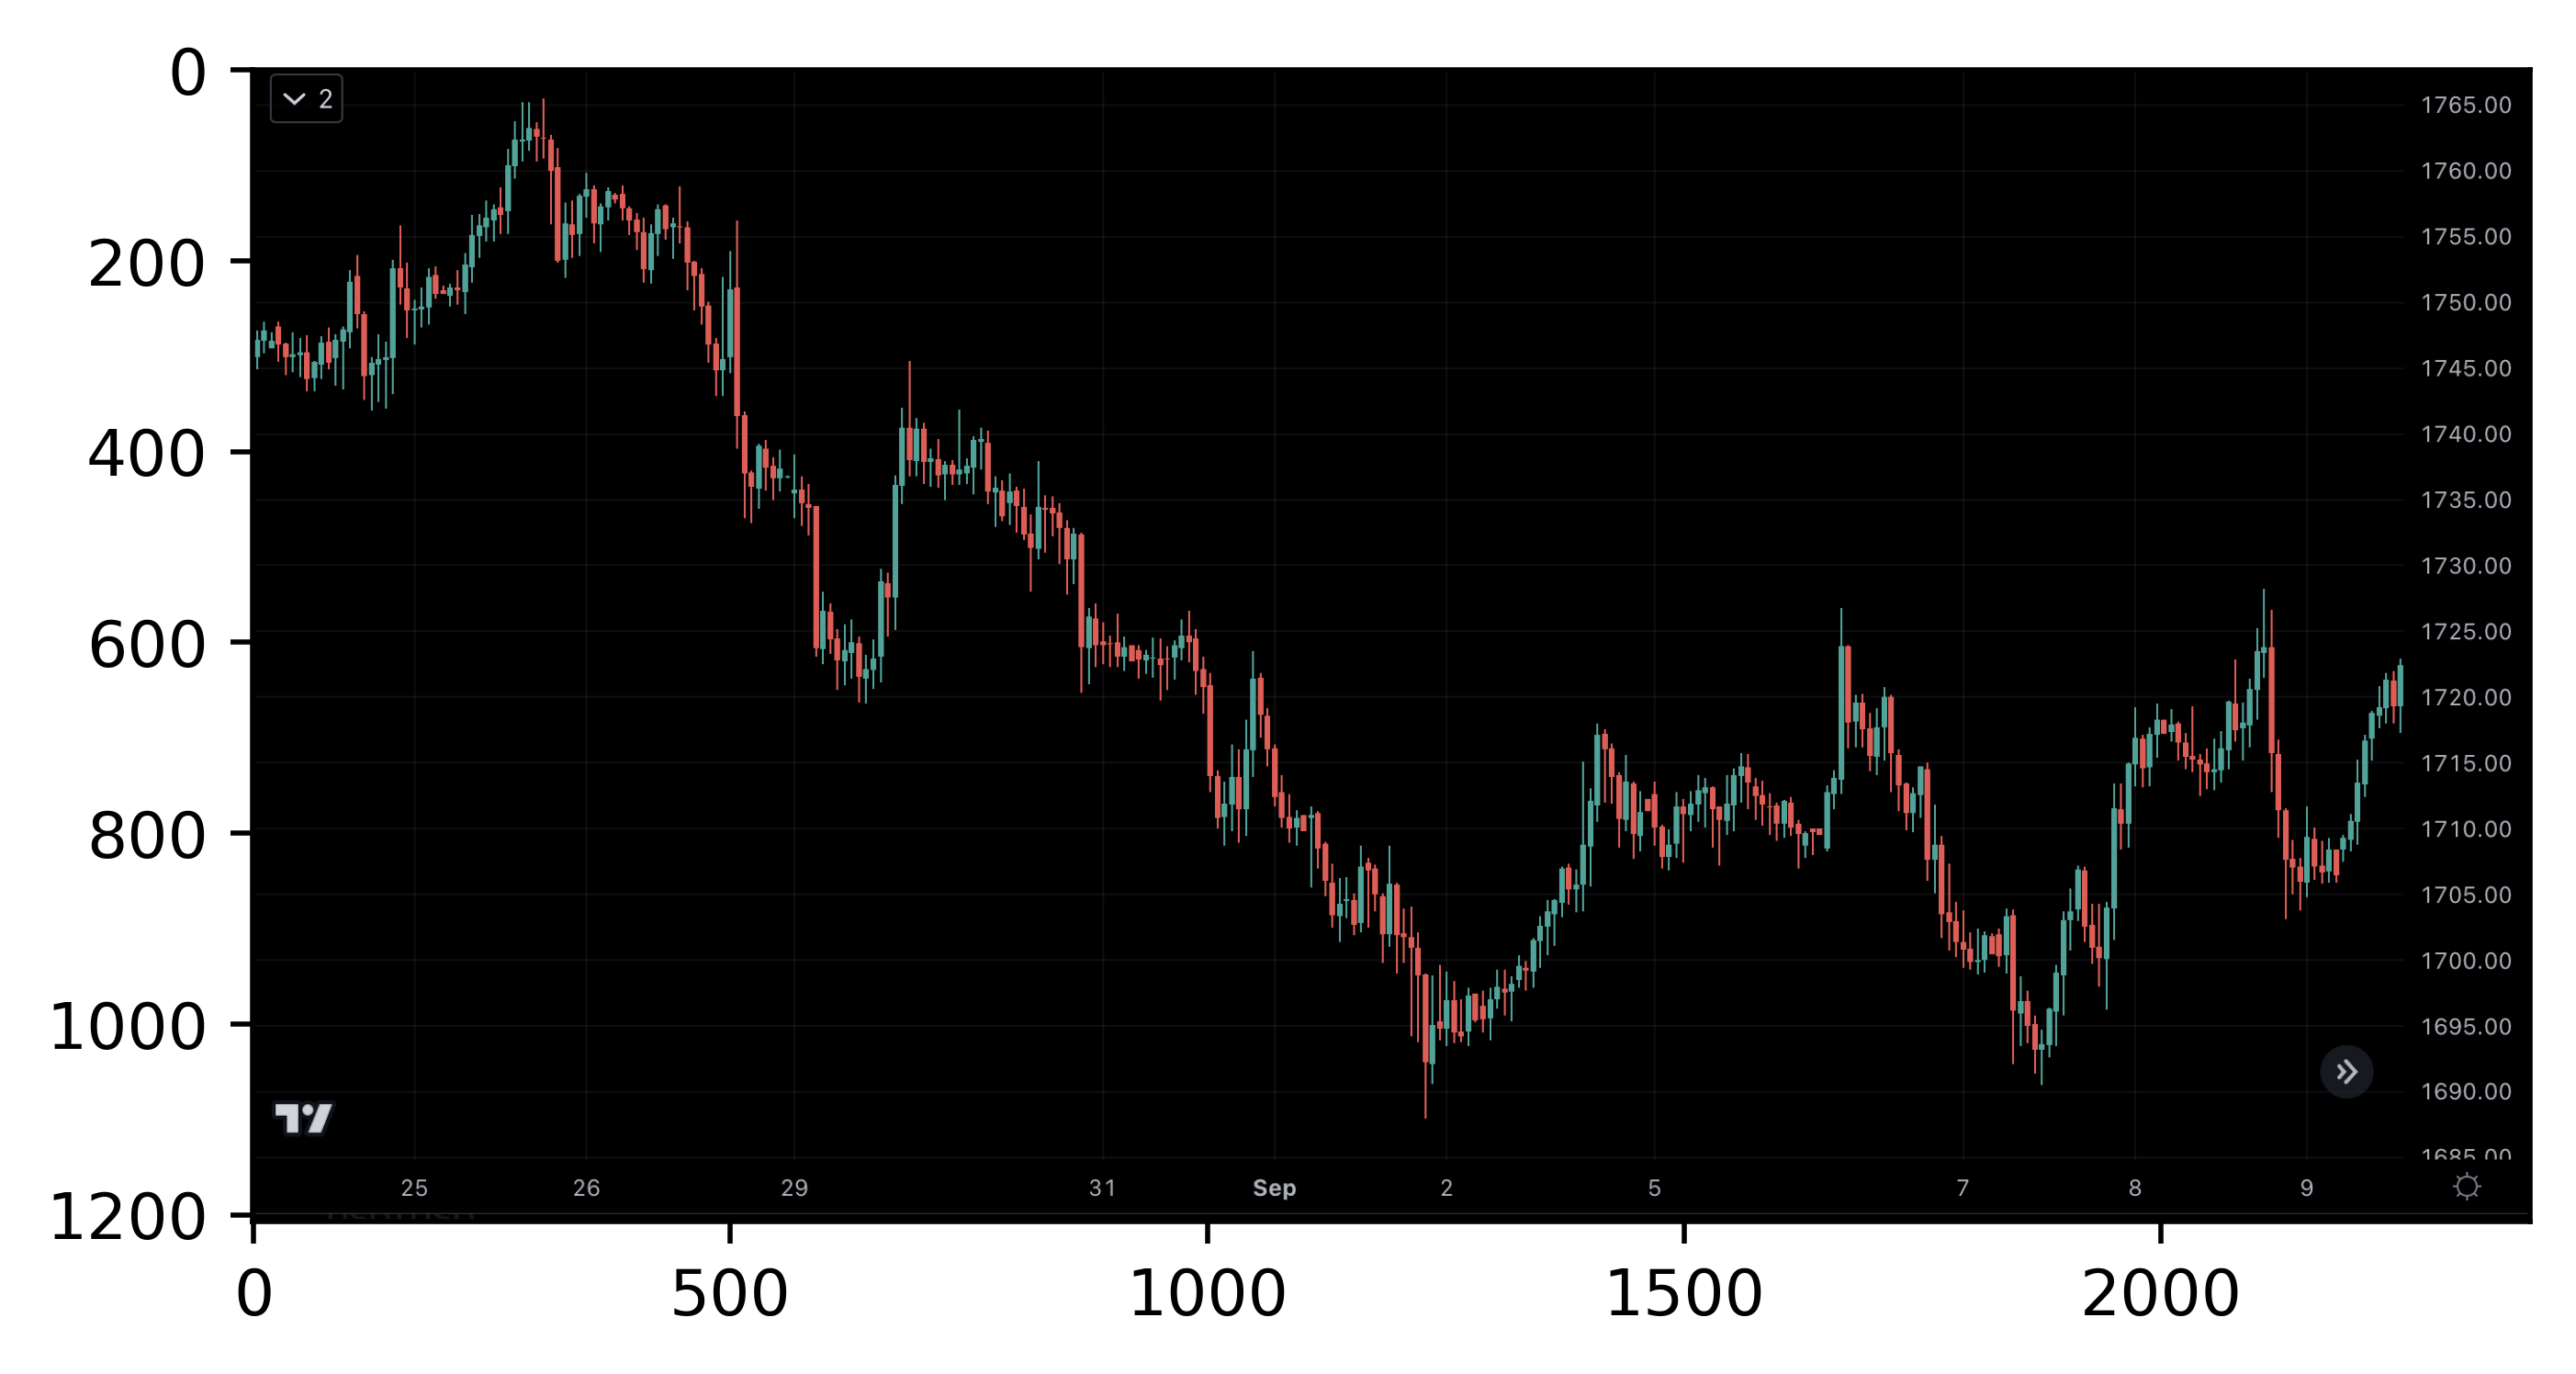

In [19]:
plt.imshow(IMG_LIST)

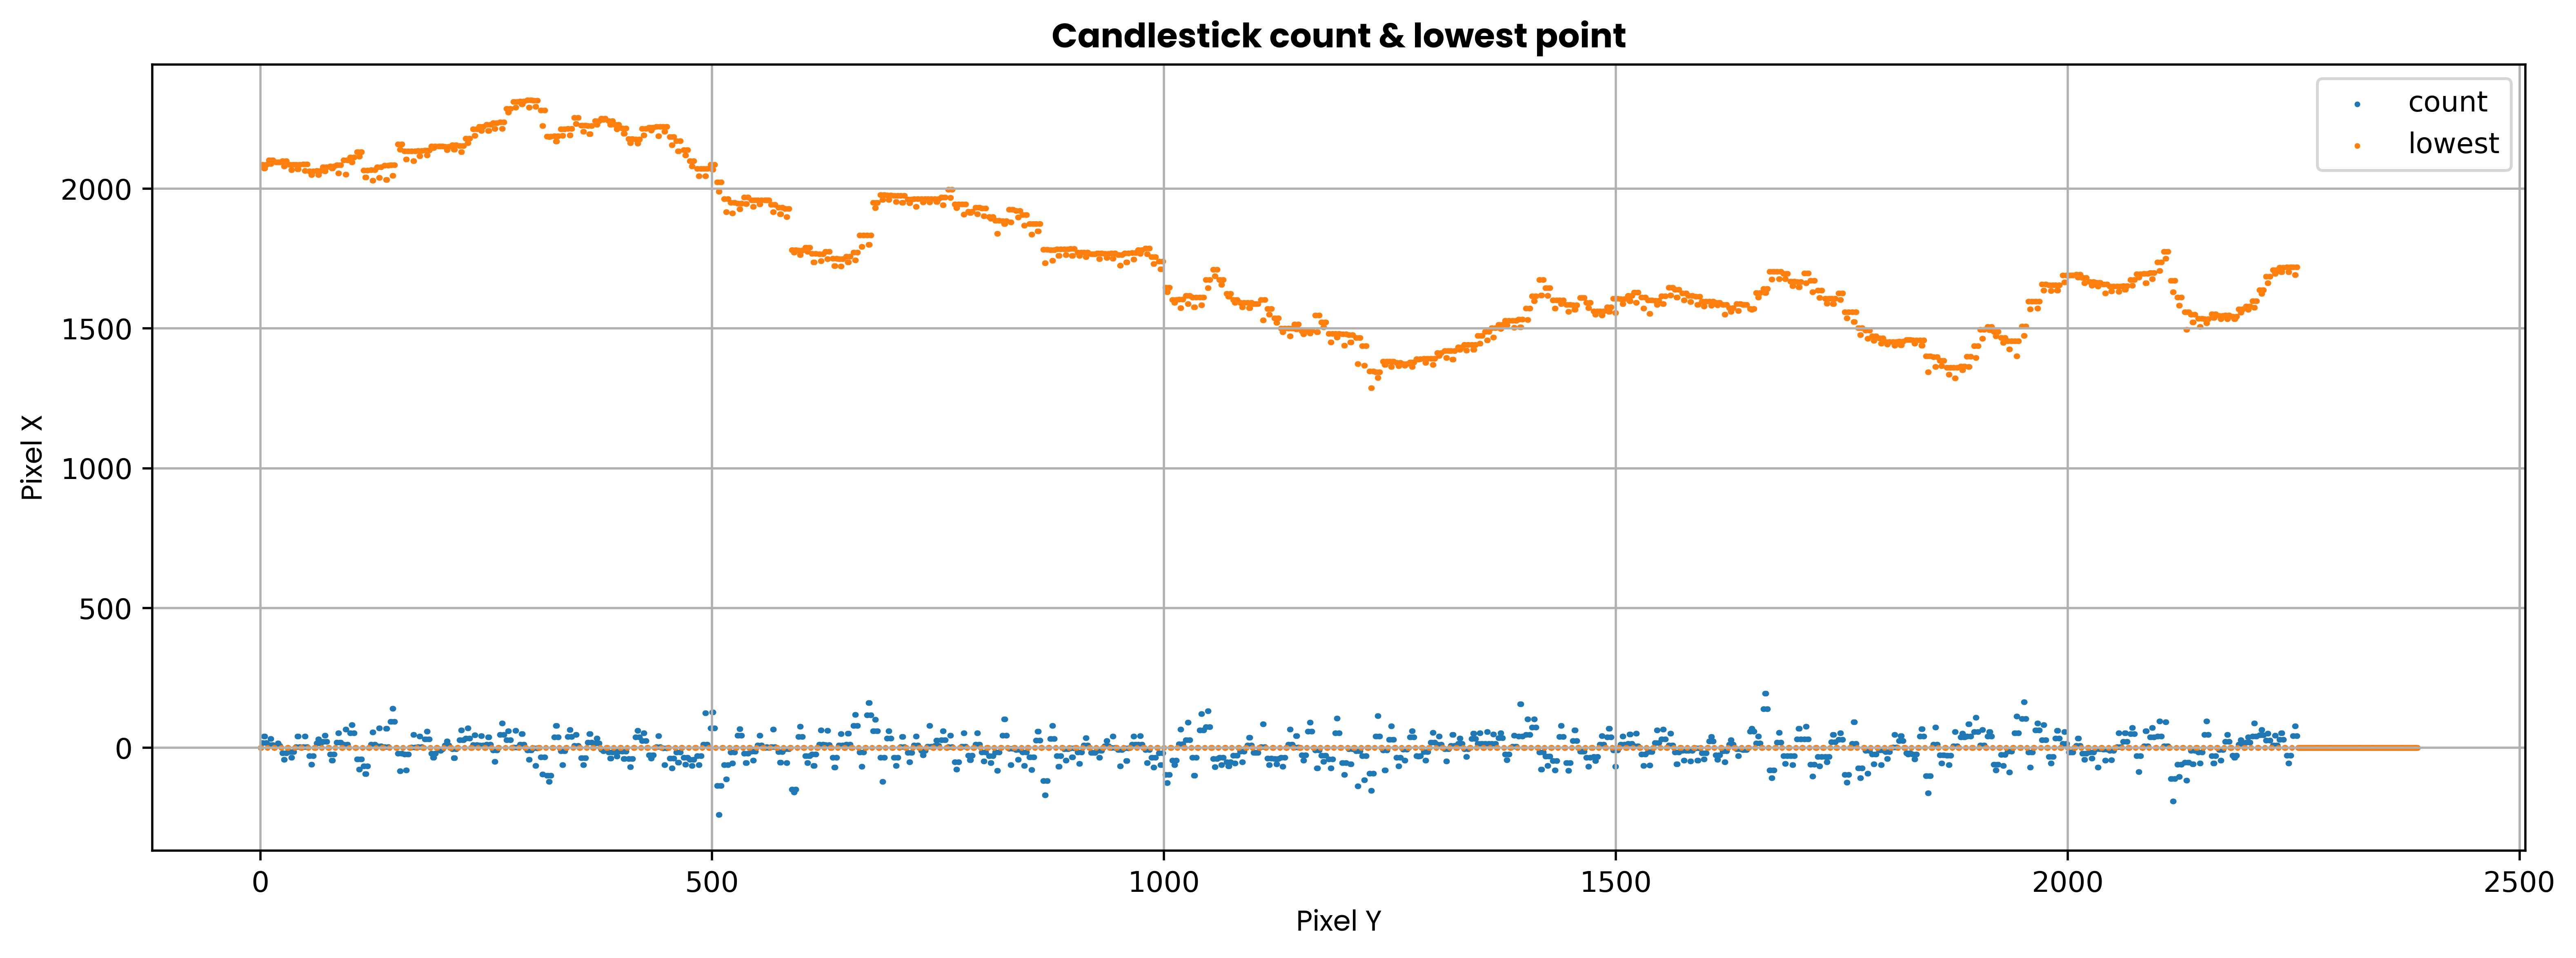

In [20]:
# Visualize candlestick reading
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(list(CANDLESTICK_POLYMERASE.keys()), list(i[0] for i in CANDLESTICK_POLYMERASE.values()), s=1, label="count")
ax.scatter(list(CANDLESTICK_POLYMERASE.keys()), list(
    i[1] for i in CANDLESTICK_POLYMERASE.values()), s=1, label="lowest")

ax.set_title("Candlestick count & lowest point", **H_FONT)
ax.set_xlabel("Pixel Y", **L_FONT)
ax.set_ylabel("Pixel X", **L_FONT)
ax.legend()
ax.grid(True)


In [30]:
# Generate candlestick value
CANDLESTICK = {} # {date: [open, high, low, close]}

# Manage datetime
# datetime(year, month, day, hour, minute, second)
initial_time = dt.datetime(2022, 8, 24, 2, 00, 00)
delta_time = dt.timedelta(hours=1)

def next_datetime(time, dt=delta_time):
    """Forward candlestick time"""
    while True:
        time += dt
        # XAU market close -> SAT 05.00 - MON 04.00
        if (time.weekday() in [1, 2, 3, 4]) | ((time.weekday() == 5) & (time.hour < 5)) | ((time.weekday() == 0) & (time.hour > 4)):
            break
    return time

candle_time = initial_time
position = 0

while position < len(CANDLESTICK_POLYMERASE):
    # Find candle (count != 0) 
    if CANDLESTICK_POLYMERASE[position][0] > 0: # Bullish candle
        CANDLESTICK[candle_time] = {"open": CANDLESTICK_POLYMERASE[position][1], 
                                    "high": CANDLESTICK_POLYMERASE[position][1] + CANDLESTICK_POLYMERASE[position][0], 
                                    "low": CANDLESTICK_POLYMERASE[position][1], 
                                    "close": CANDLESTICK_POLYMERASE[position][1] + CANDLESTICK_POLYMERASE[position][0],
                                    "type": "bullish"}
        position += 1
        temp_high = CANDLESTICK[candle_time]["high"]
        temp_low = CANDLESTICK[candle_time]["low"]
        while position < len(CANDLESTICK_POLYMERASE):
            if CANDLESTICK_POLYMERASE[position][0] == 0:
                break
            if (temp_high != CANDLESTICK_POLYMERASE[position][1] + CANDLESTICK_POLYMERASE[position][0]) | (temp_low != CANDLESTICK_POLYMERASE[position][1]):
                CANDLESTICK[candle_time]["high"] = CANDLESTICK_POLYMERASE[position][1] + CANDLESTICK_POLYMERASE[position][0]
                CANDLESTICK[candle_time]["low"] = CANDLESTICK_POLYMERASE[position][1]
            position += 1
        candle_time = next_datetime(candle_time)
    elif CANDLESTICK_POLYMERASE[position][0] < 0: # Bearish candle
        CANDLESTICK[candle_time] = {"open": CANDLESTICK_POLYMERASE[position][1] - CANDLESTICK_POLYMERASE[position][0], 
                                    "high": CANDLESTICK_POLYMERASE[position][1] - CANDLESTICK_POLYMERASE[position][0], 
                                    "low": CANDLESTICK_POLYMERASE[position][1], 
                                    "close": CANDLESTICK_POLYMERASE[position][1],
                                    "type": "bearish"}
        position += 1
        temp_high = CANDLESTICK[candle_time]["high"]
        temp_low = CANDLESTICK[candle_time]["low"]
        while position < len(CANDLESTICK_POLYMERASE):
            if CANDLESTICK_POLYMERASE[position][0] == 0:
                break
            if (temp_high != CANDLESTICK_POLYMERASE[position][1] - CANDLESTICK_POLYMERASE[position][0]) | (temp_low != CANDLESTICK_POLYMERASE[position][1]):
                CANDLESTICK[candle_time]["high"] = CANDLESTICK_POLYMERASE[position][1] - \
                    CANDLESTICK_POLYMERASE[position][0]
                CANDLESTICK[candle_time]["low"] = CANDLESTICK_POLYMERASE[position][1]
            position += 1
        candle_time = next_datetime(candle_time)
    position += 1

DF_CANDLESTICK = pd.DataFrame(CANDLESTICK).transpose()
DF_CANDLESTICK


,open,high,low,close,type
2022-08-24 02:00:00,2086,2114,2073,2104,bullish
2022-08-24 03:00:00,2103,2123,2090,2114,bullish
2022-08-24 04:00:00,2095,2112,2095,2103,bullish
2022-08-24 05:00:00,2118,2123,2081,2099,bearish
2022-08-24 06:00:00,2100,2101,2067,2086,bearish
...,...,...,...,...,...
2022-09-09 09:00:00,1686,1715,1663,1713,bullish
2022-09-09 10:00:00,1710,1741,1697,1719,bullish
2022-09-09 11:00:00,1718,1755,1702,1748,bullish
2022-09-09 12:00:00,1747,1757,1702,1720,bearish


In [31]:
# Calibrate candlestick price
c_date = dt.datetime(2022, 8, 26, 21, 00, 00)
c_open = 1751.12
c_high = 1756.21
c_low = 1738.90
c_close = 1741.45

# 2022-8-26-21,1751.12,1756.21,1738.90,1741.45

# Get non-calibrated price from candlestick
non_calibrated_value = CANDLESTICK[c_date]
candle_price_per_pixel = abs(c_open - c_close) / abs(non_calibrated_value["open"] - non_calibrated_value["close"])
wick_price_per_pixel = abs(c_high - c_low) / abs(non_calibrated_value["high"] - non_calibrated_value["low"])
price_per_pixel = (candle_price_per_pixel + wick_price_per_pixel) / 2

# Calculate price
def calibrate_price(pixel, price_per_pixel=price_per_pixel, exp_pixel=non_calibrated_value["open"], exp_price=c_open):
    """Calculate price from pixel"""
    return exp_price - ((exp_pixel-pixel)*price_per_pixel)

for candlestick_date in CANDLESTICK.keys():
    CANDLESTICK[candlestick_date]["open"] = round(calibrate_price(CANDLESTICK[candlestick_date]["open"]), 2)
    CANDLESTICK[candlestick_date]["high"] = round(calibrate_price(CANDLESTICK[candlestick_date]["high"]), 2)
    CANDLESTICK[candlestick_date]["low"] = round(calibrate_price(CANDLESTICK[candlestick_date]["low"]), 2)
    CANDLESTICK[candlestick_date]["close"] = round(calibrate_price(CANDLESTICK[candlestick_date]["close"]), 2)
    
print(candle_price_per_pixel, wick_price_per_pixel)
print(abs(candle_price_per_pixel - wick_price_per_pixel) * 100 / candle_price_per_pixel)


0.07162962962962849 0.0724267782426776
1.1128755197686808


In [32]:
df = pd.DataFrame(CANDLESTICK).transpose().reset_index()
df

,index,open,high,low,close,type
0,2022-08-24 02:00:00,1745.86,1747.88,1744.93,1747.16,bullish
1,2022-08-24 03:00:00,1747.09,1748.53,1746.15,1747.88,bullish
2,2022-08-24 04:00:00,1746.51,1747.73,1746.51,1747.09,bullish
3,2022-08-24 05:00:00,1748.17,1748.53,1745.5,1746.8,bearish
4,2022-08-24 06:00:00,1746.87,1746.94,1744.49,1745.86,bearish
...,...,...,...,...,...,...
295,2022-09-09 09:00:00,1717.05,1719.14,1715.39,1719.0,bullish
296,2022-09-09 10:00:00,1718.78,1721.01,1717.84,1719.43,bullish
297,2022-09-09 11:00:00,1719.36,1722.02,1718.2,1721.52,bullish
298,2022-09-09 12:00:00,1721.44,1722.16,1718.2,1719.5,bearish


: 